# 決定境界の可視化
本章では前章までに学んだ教師あり学習の分類モデルがどのように分類しているかの可視化をすると同時に主成分分析の応用をとして決定境界を可視化する。

# ライブラリのインポート

In [32]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# データの読み込み

In [12]:
df = pd.read_csv("iris.csv")
df.head()

,category,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


# 説明変数(X)と目的変数(Y)で分ける

In [13]:
y_name = "category"
y = df[y_name].values
x_table = df.drop(y_name, axis=1)
x_name = x_table.columns
x = x_table.values

# 主成分分析で次元圧縮

In [23]:
pca = PCA(n_components=2)
pca.fit(x)
tx = pca.transform(x)

# 次元圧縮したデータを可視化

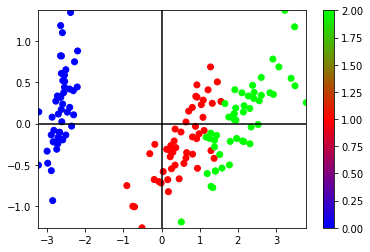

In [24]:
plt.scatter(tx[:, 0],tx[:, 1], cmap="brg", c=y)
plt.plot([0, 0],[min(tx[:, 1]), max(tx[:, 1])], color="#000000")
plt.plot([min(tx[:, 0]), max(tx[:, 0])], [0, 0], color="#000000")
plt.xlim(min(tx[:, 0]), max(tx[:, 0]))
plt.ylim(min(tx[:, 1]), max(tx[:, 1]))
plt.colorbar()
plt.show()

# 決定境界を描画する関数を記述
決定境界ではcontourf関数でメッシュグリッドのZ軸の値で色分けを行う。また、色分けの範囲の都合上データは正規化する。

In [44]:
def showline(x, y, model, modelname):
    fig, ax = plt.subplots(figsize=(8, 6))
    X, Y = np.meshgrid(np.linspace(*ax.get_xlim(), 1000), np.linspace(*ax.get_ylim(), 1000))
    XY = np.column_stack([X.ravel(), Y.ravel()])
    x = preprocessing.minmax_scale(x)
    model.fit(x, y)
    Z = model.predict(XY).reshape(X.shape)
    plt.contourf(X, Y, Z, alpha=0.1, cmap="brg")
    plt.scatter(x[:, 0], x[:, 1], c=y, s=7, cmap="brg")
    plt.xlim(min(x[:, 0]), max(x[:, 0]))
    plt.ylim(min(x[:, 1]), max(x[:, 1]))
    plt.title(modelname)
    plt.colorbar()
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.show()

# 使用する機械学習ライブラリ

In [45]:
#SVM
from sklearn.svm import SVC
#判別分析
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#ロジスティック回帰
from sklearn.linear_model import LogisticRegression as LR
#決定木
from sklearn.tree import DecisionTreeClassifier as DTC
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier as RF
#ナイーブベイズ
from sklearn.naive_bayes import MultinomialNB as NB
#k近傍法
from sklearn.neighbors import KNeighborsClassifier as KNN

# カーネル法SVM
線形に分類できない場合にラベリングされたデータを高次元に移して分類境界を作り元の次元に戻すことでデータを分類する。

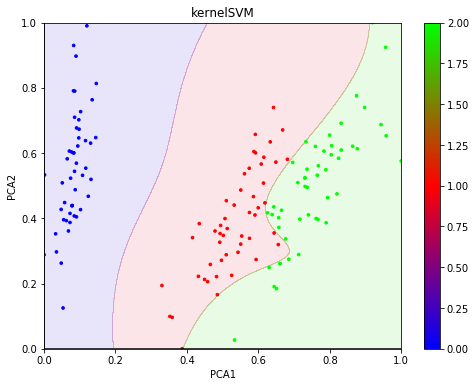

In [46]:
model = SVC(kernel="rbf", C=1E6)
showline(tx, y, model, "kernelSVM")

# 線形SVM
一般的なSVMの手法。決定境界と支持ベクタ(サポートベクタ)を持ち、支持ベクタが最も大きくなるように勾配と切片を算出して線形分類する。

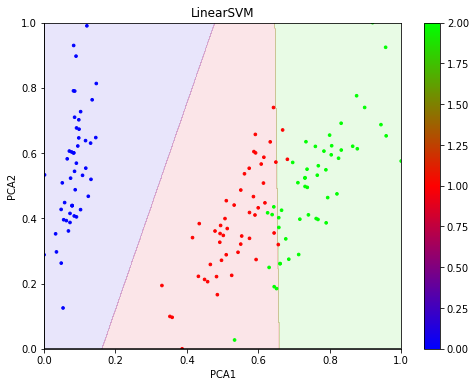

In [47]:
model = SVC(kernel="linear")
showline(tx, y, model, "LinearSVM")

# 判別分析
一般的に統計学などで用いられるアルゴリズム。重回帰分析の分類版のようなもの。

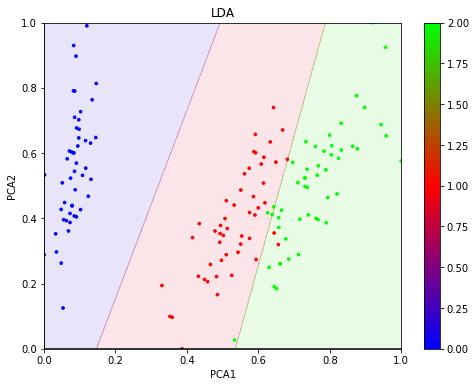

In [48]:
model = LDA()
showline(tx, y, model, "LDA")

# ロジスティック回帰
機械学習による分類としては最も簡単で初心者に使いやすいアルゴリズム。シグモイド関数を用いて陰性陽性判定している。

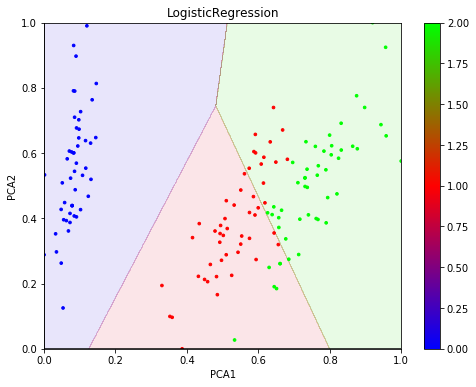

In [49]:
model = LR()
showline(tx, y, model, "LogisticRegression")

# 決定木
1つの項目ごとに分類していくアルゴリズム。そのため決定境界は縦線と横線のみとなっている。また、1つの項目ごとに分類していくため分類過程があり、過程の可視化や各項目の1つの項目だけでどれだけ分類できるかの指標(重要度)が分かる。

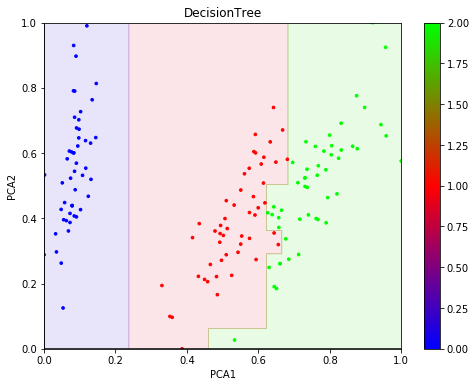

In [50]:
model = DTC()
showline(tx, y, model, "DecisionTree")

# ランダムフォレスト
アンサンブル学習の一つで、決定木を用いている。手法としてはデータをランダムに分割して決定木に学習させ作成された決定木のそれぞれのモデルにテストデータを入力して多数決(最頻値)を用いて分類する。

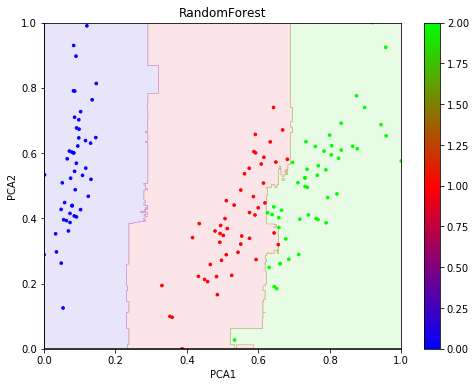

In [51]:
model = RF()
showline(tx, y, model, "RandomForest")

# ナイーブベイズ
ベイズの定理を用いて分類を行う。ラベルごとにデータセットの確率を算出して高い方のラベルが出力結果になる。

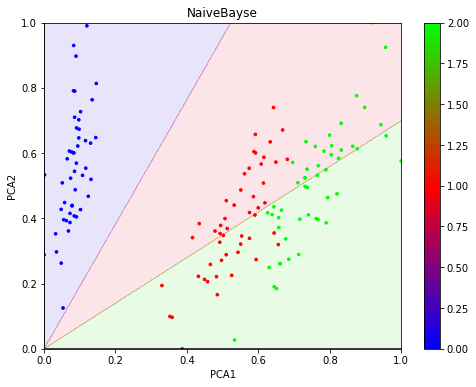

In [52]:
model = NB()
showline(tx, y, model, "NaiveBayse")

# k-NN(k近傍法)
あらかじめデータをプロットしておき、近くにあるデータ任意のk個で多い方に分類される。

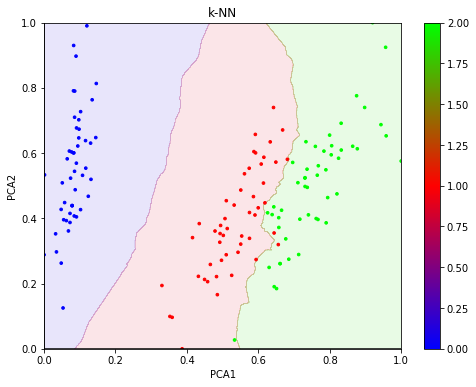

In [53]:
model = KNN()
showline(tx, y, model, "k-NN")